# Overview:
Parkinson's disease is a progressive nervous system disorder that affects movement. Symptoms start gradually, sometimes starting with a barely noticeable tremor in just one hand. Tremors are common, but the disorder also commonly causes stiffness or slowing of movement.

In the early stages of Parkinson's disease, your face may show little or no expression. Your arms may not swing when you walk. Your speech may become soft or slurred. Parkinson's disease symptoms worsen as your condition progresses over time.

Although Parkinson's disease can't be cured, medications might significantly improve your symptoms. Occasionally, your doctor may suggest surgery to regulate certain regions of your brain and improve your symptoms.

Dataset:
- [Oxford Parkinson's Disease Detection Dataset](https://www.kaggle.com/datasets/thecansin/parkinsons-data-set)

### Attribute Information:

- Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
- measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation


# Objective

Using different machine learning models to predict the presence of parkinson's disease in an individual.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('parkinsons.csv')

In [3]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data.shape

(195, 24)

In [14]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
# checking for missing values
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [12]:
# Checking for duplicated values
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Length: 195, dtype: bool

In [13]:
# getting statistical measures about the data
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [18]:
# distribution of target Variable
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


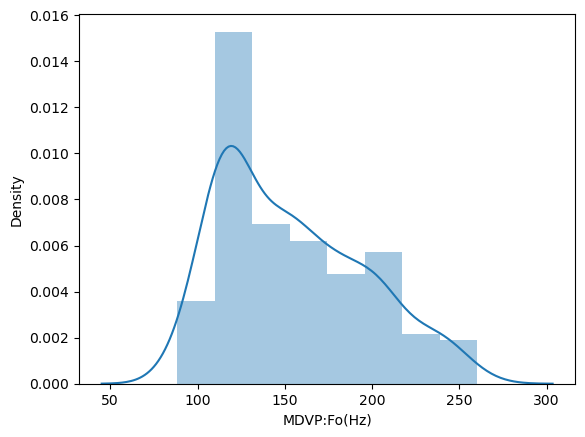

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


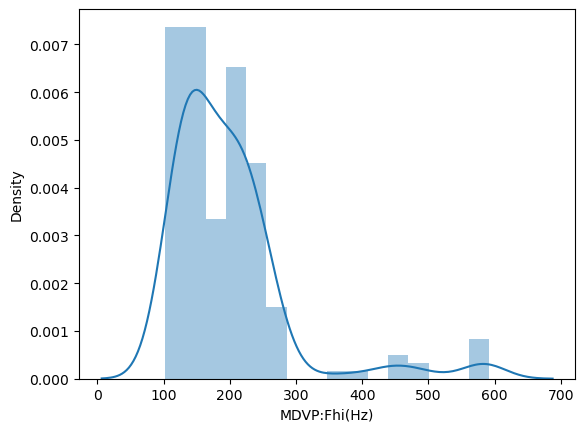

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


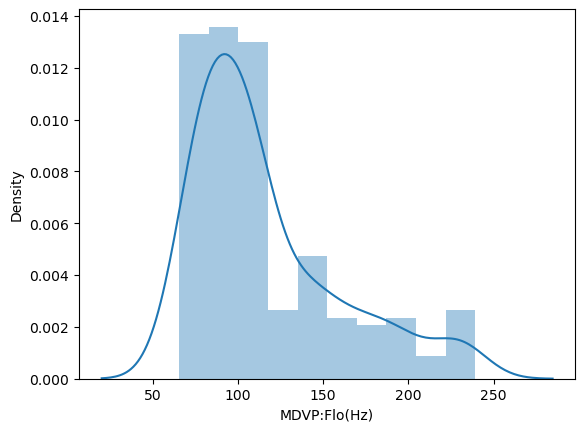

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


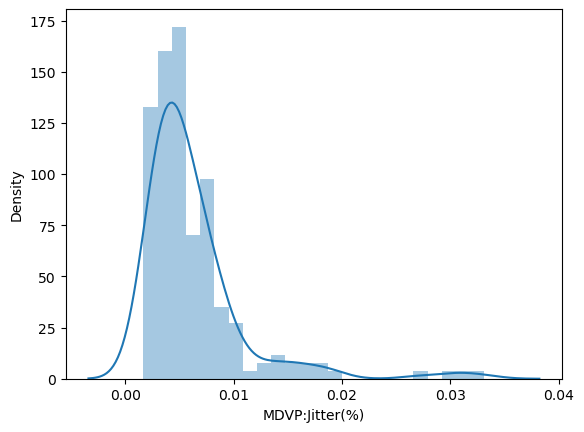

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


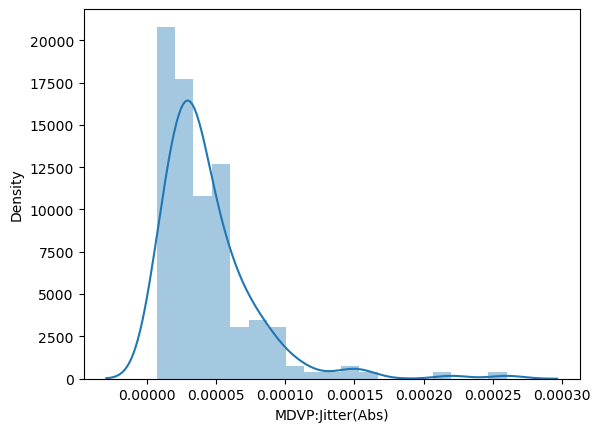

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


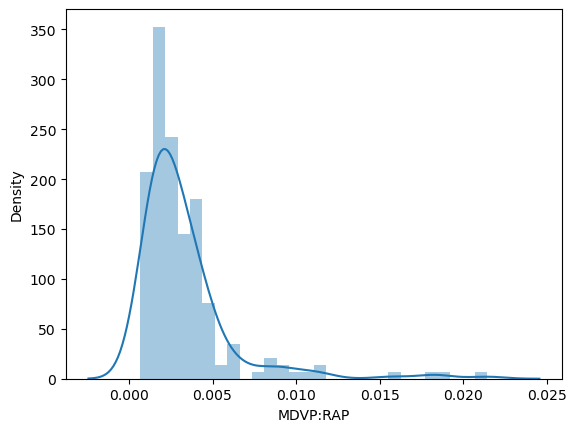

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


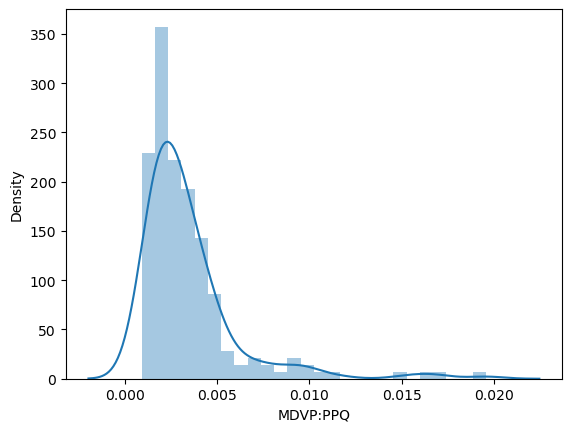

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


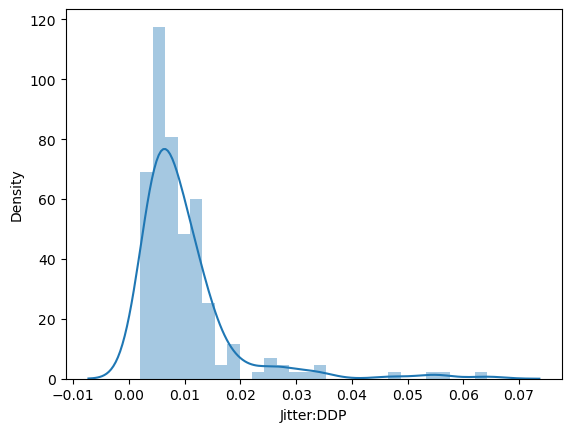

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


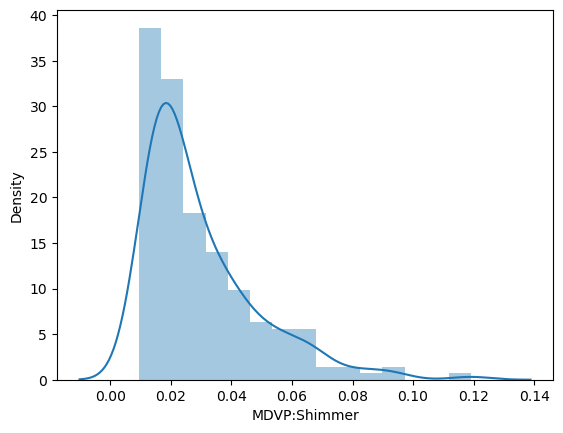

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


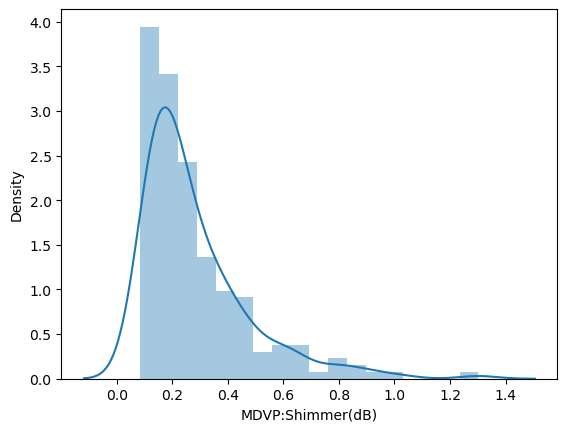

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


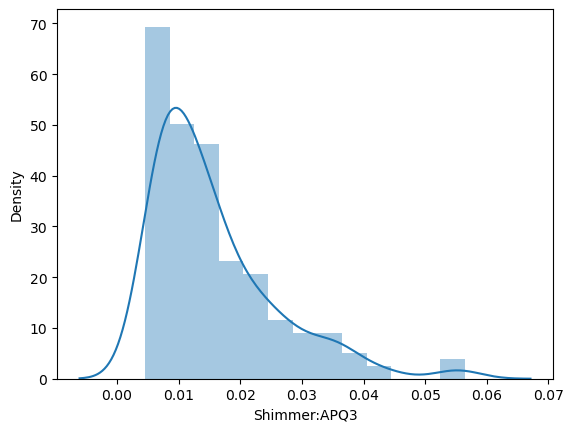

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


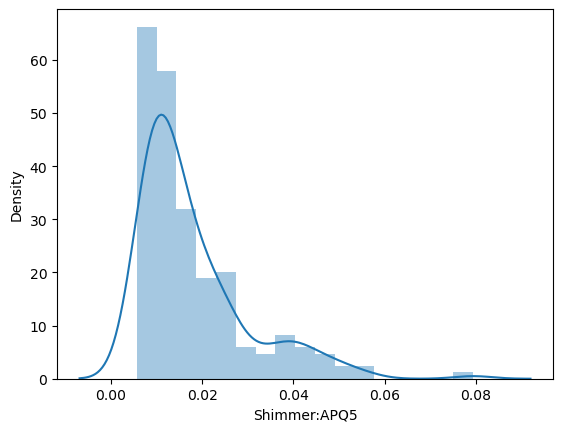

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


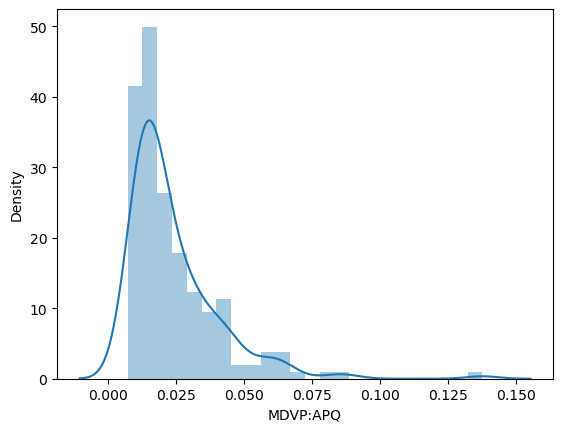

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


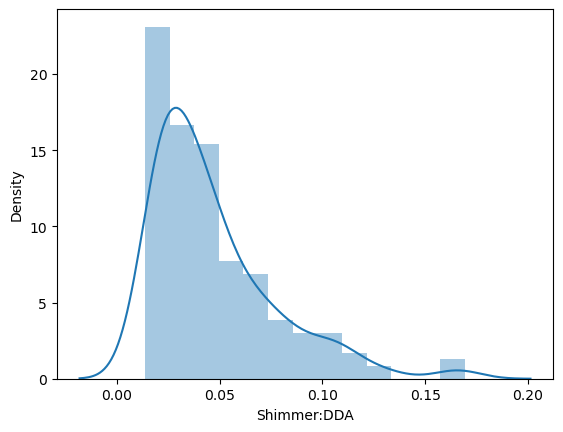

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


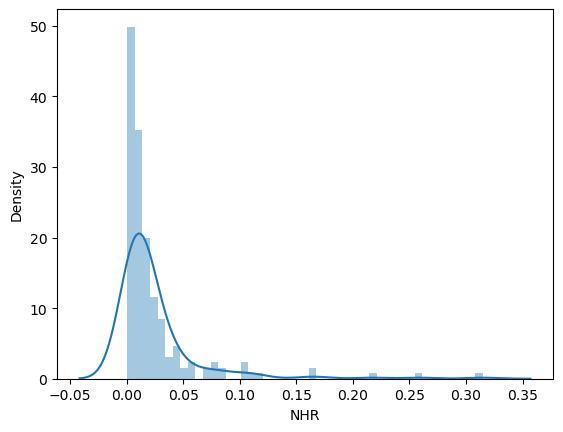

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


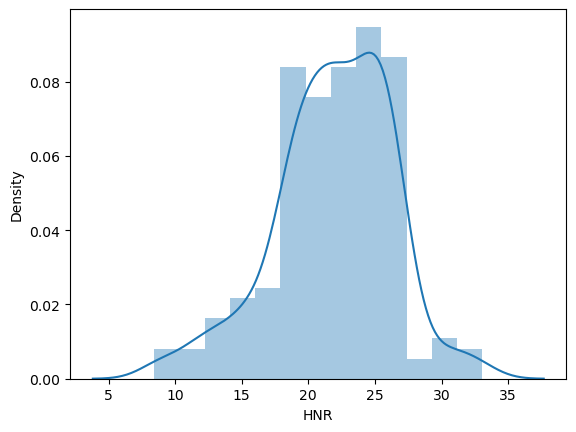

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


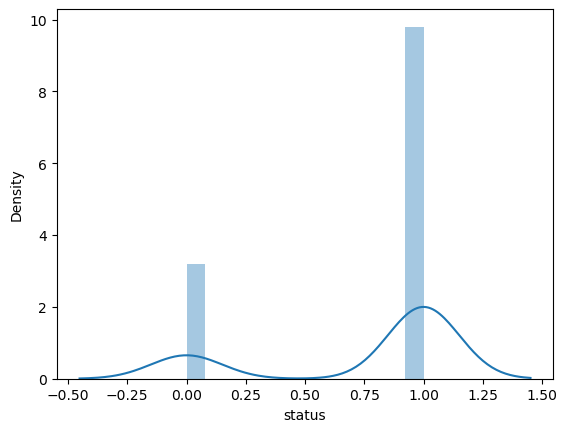

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


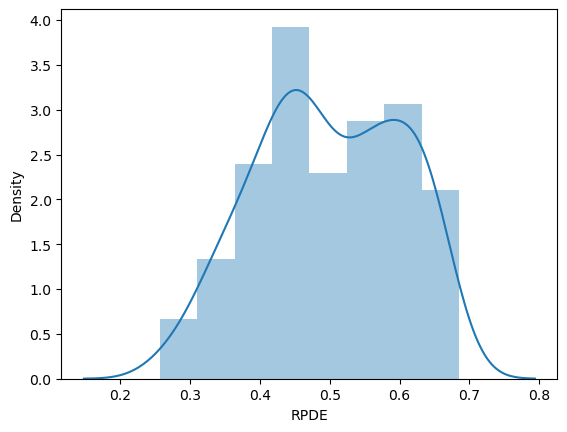

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


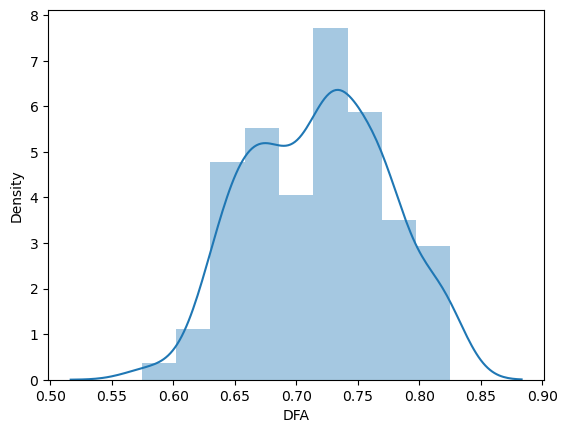

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


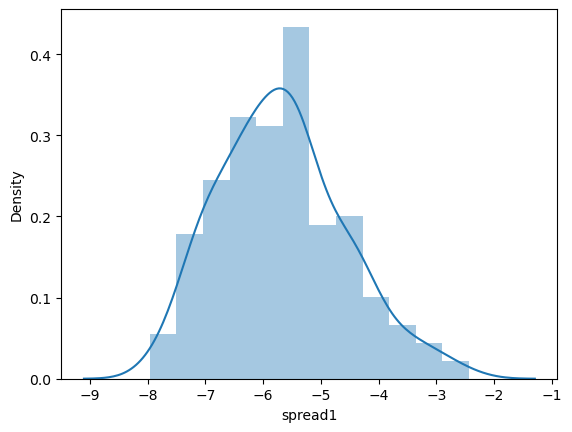

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


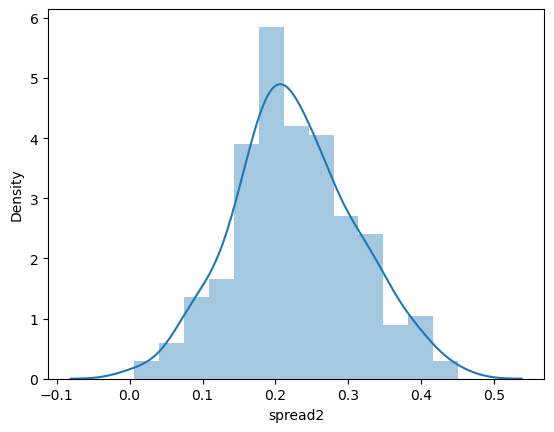

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


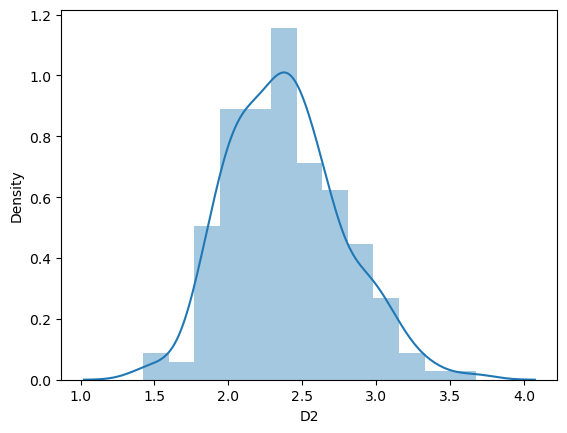

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\798262763.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


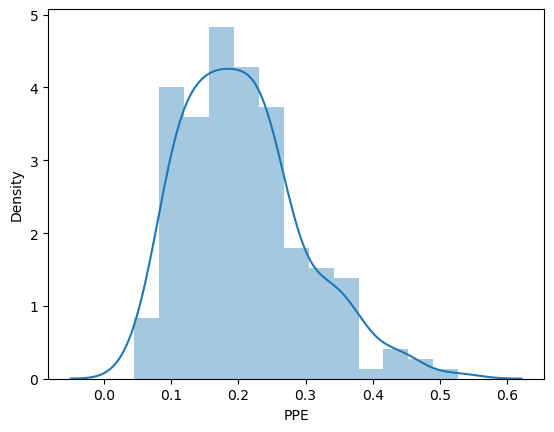

In [23]:
# Distribution of the dataset

def distplot(col):
    sns.distplot(data[col])
    plt.show()
    
for i in list(data.columns)[1:]:
    distplot(i)

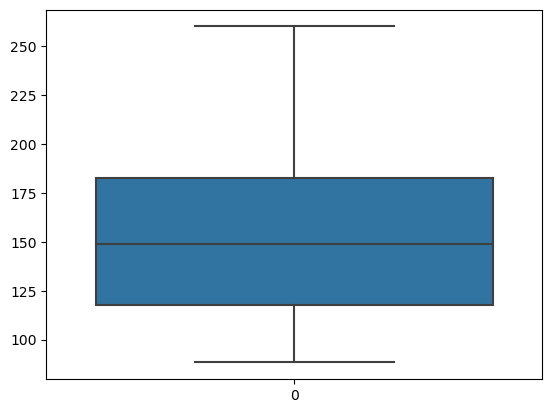

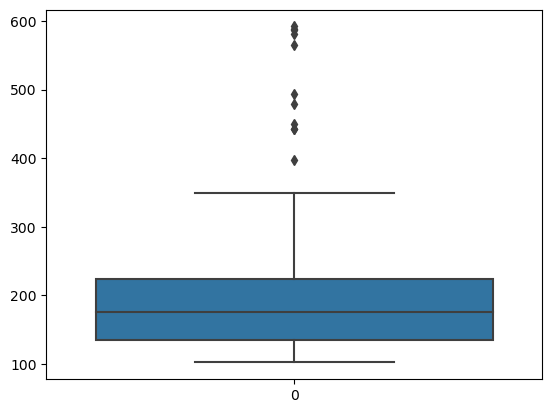

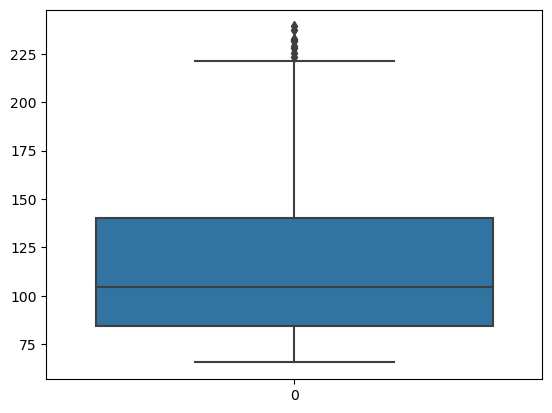

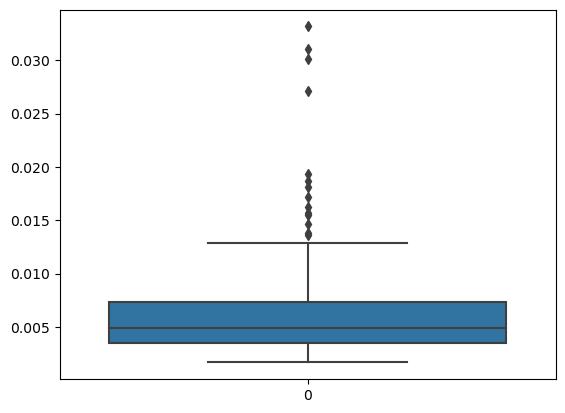

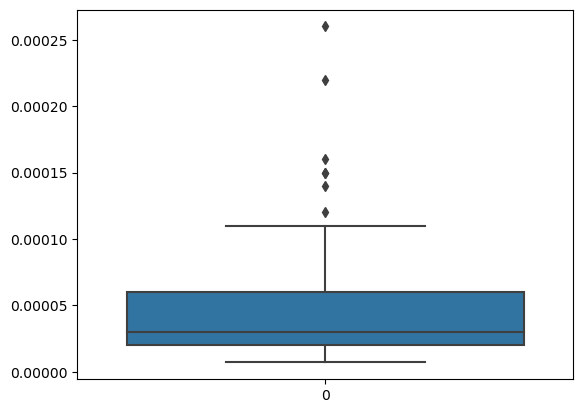

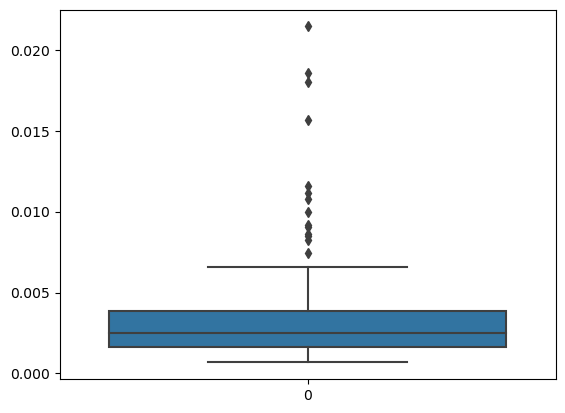

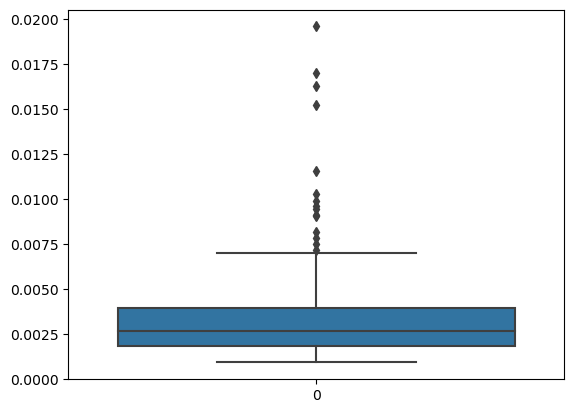

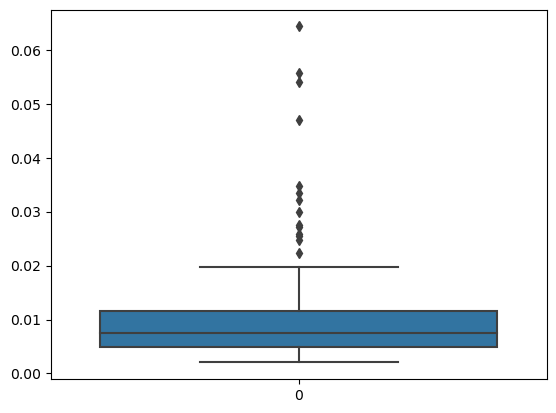

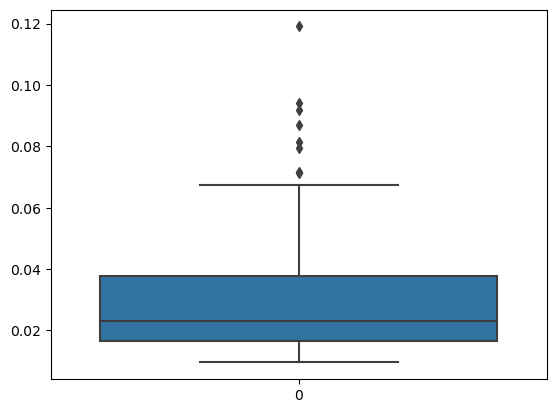

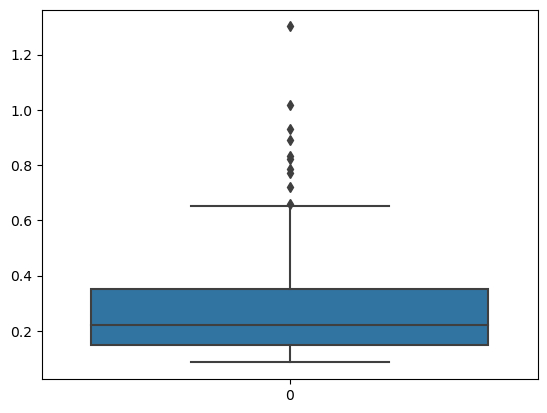

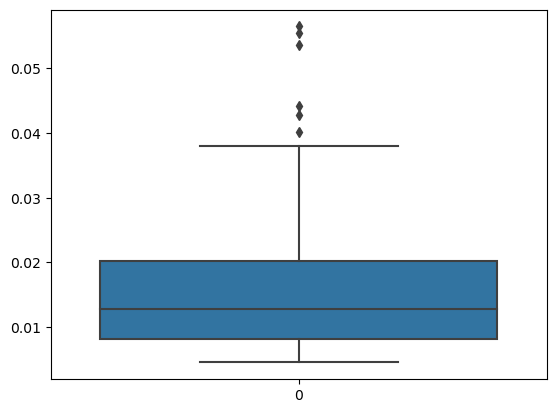

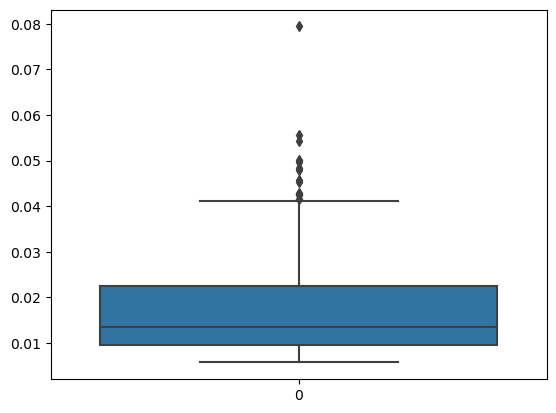

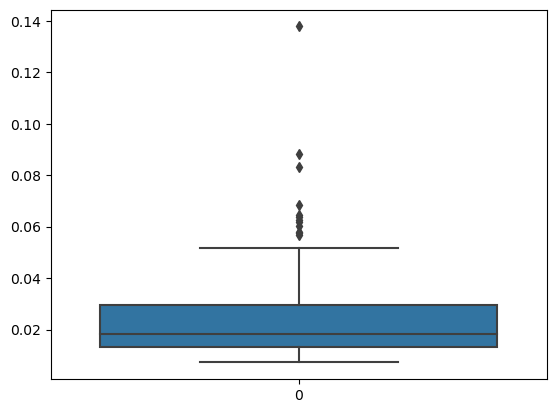

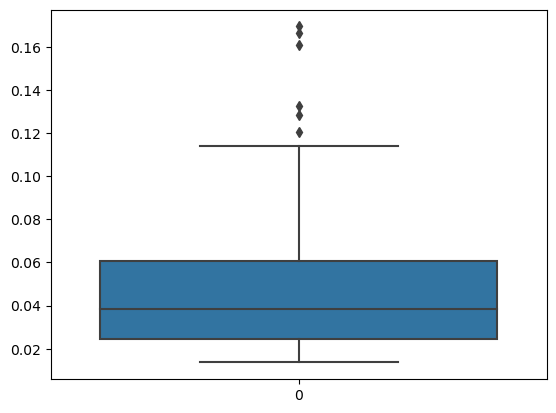

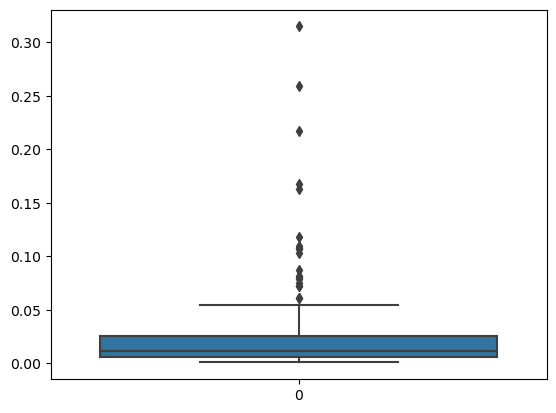

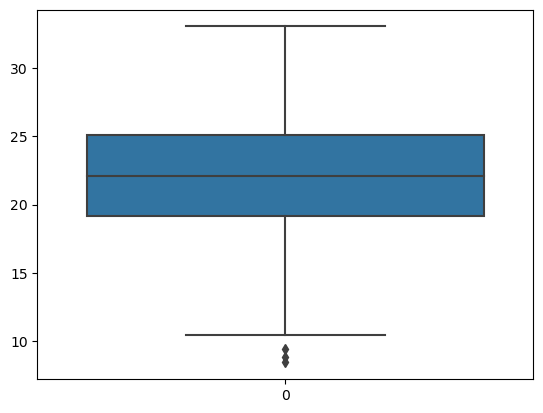

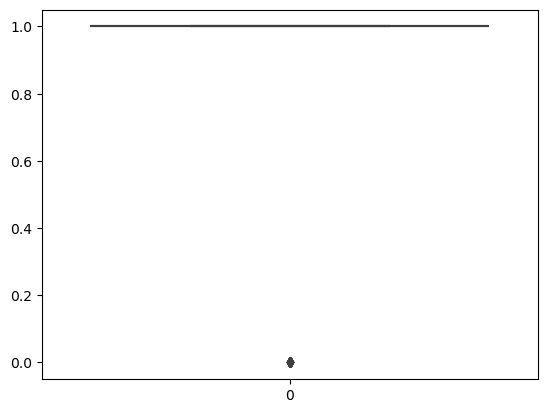

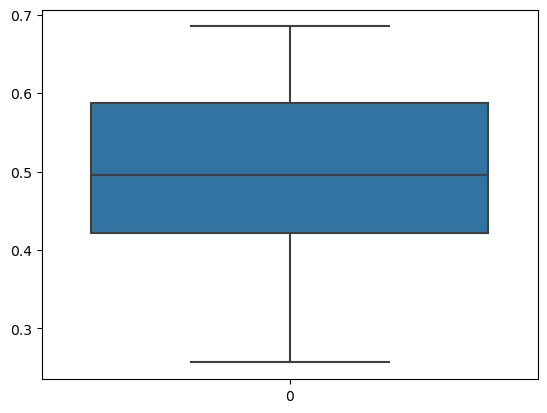

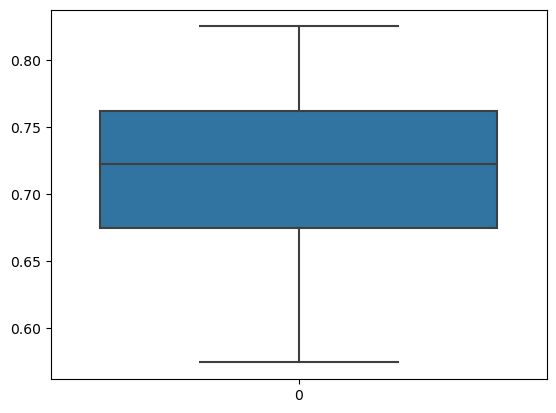

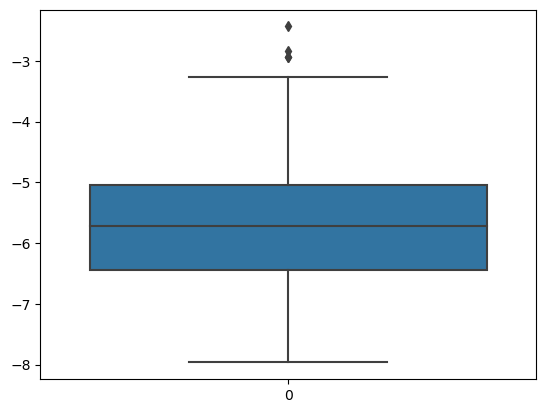

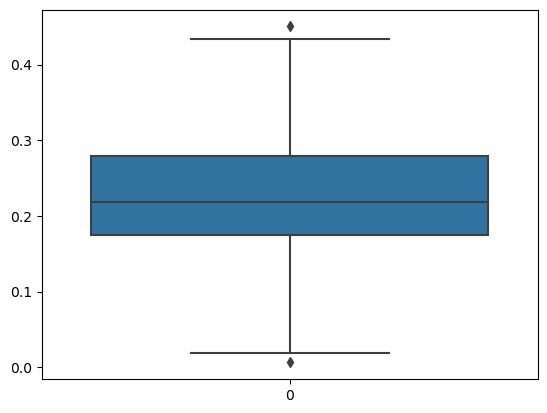

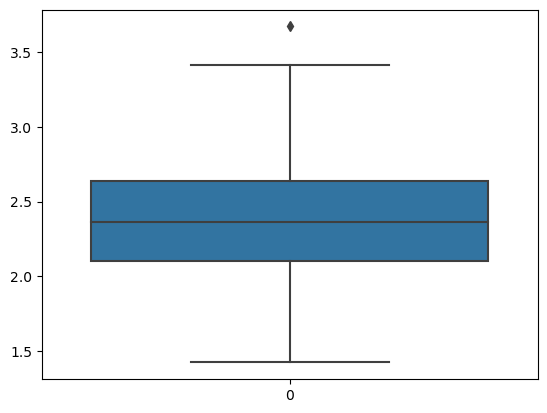

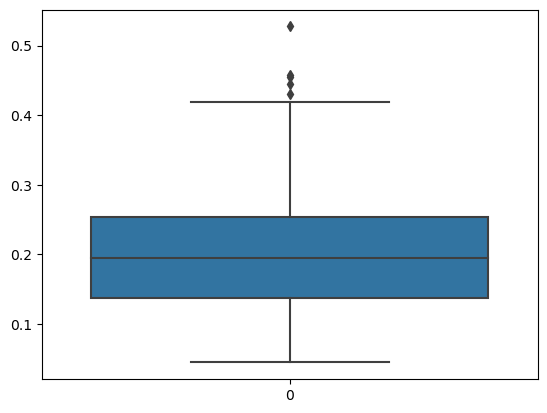

In [24]:
# Checking for outliers:
def boxplot(col):
    sns.boxplot(data[col])
    plt.show()
    
for i in list(data.columns)[1:]:
    boxplot(i)

C:\Users\Jeet Kavaiya\AppData\Local\Temp\ipykernel_30468\2624328409.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

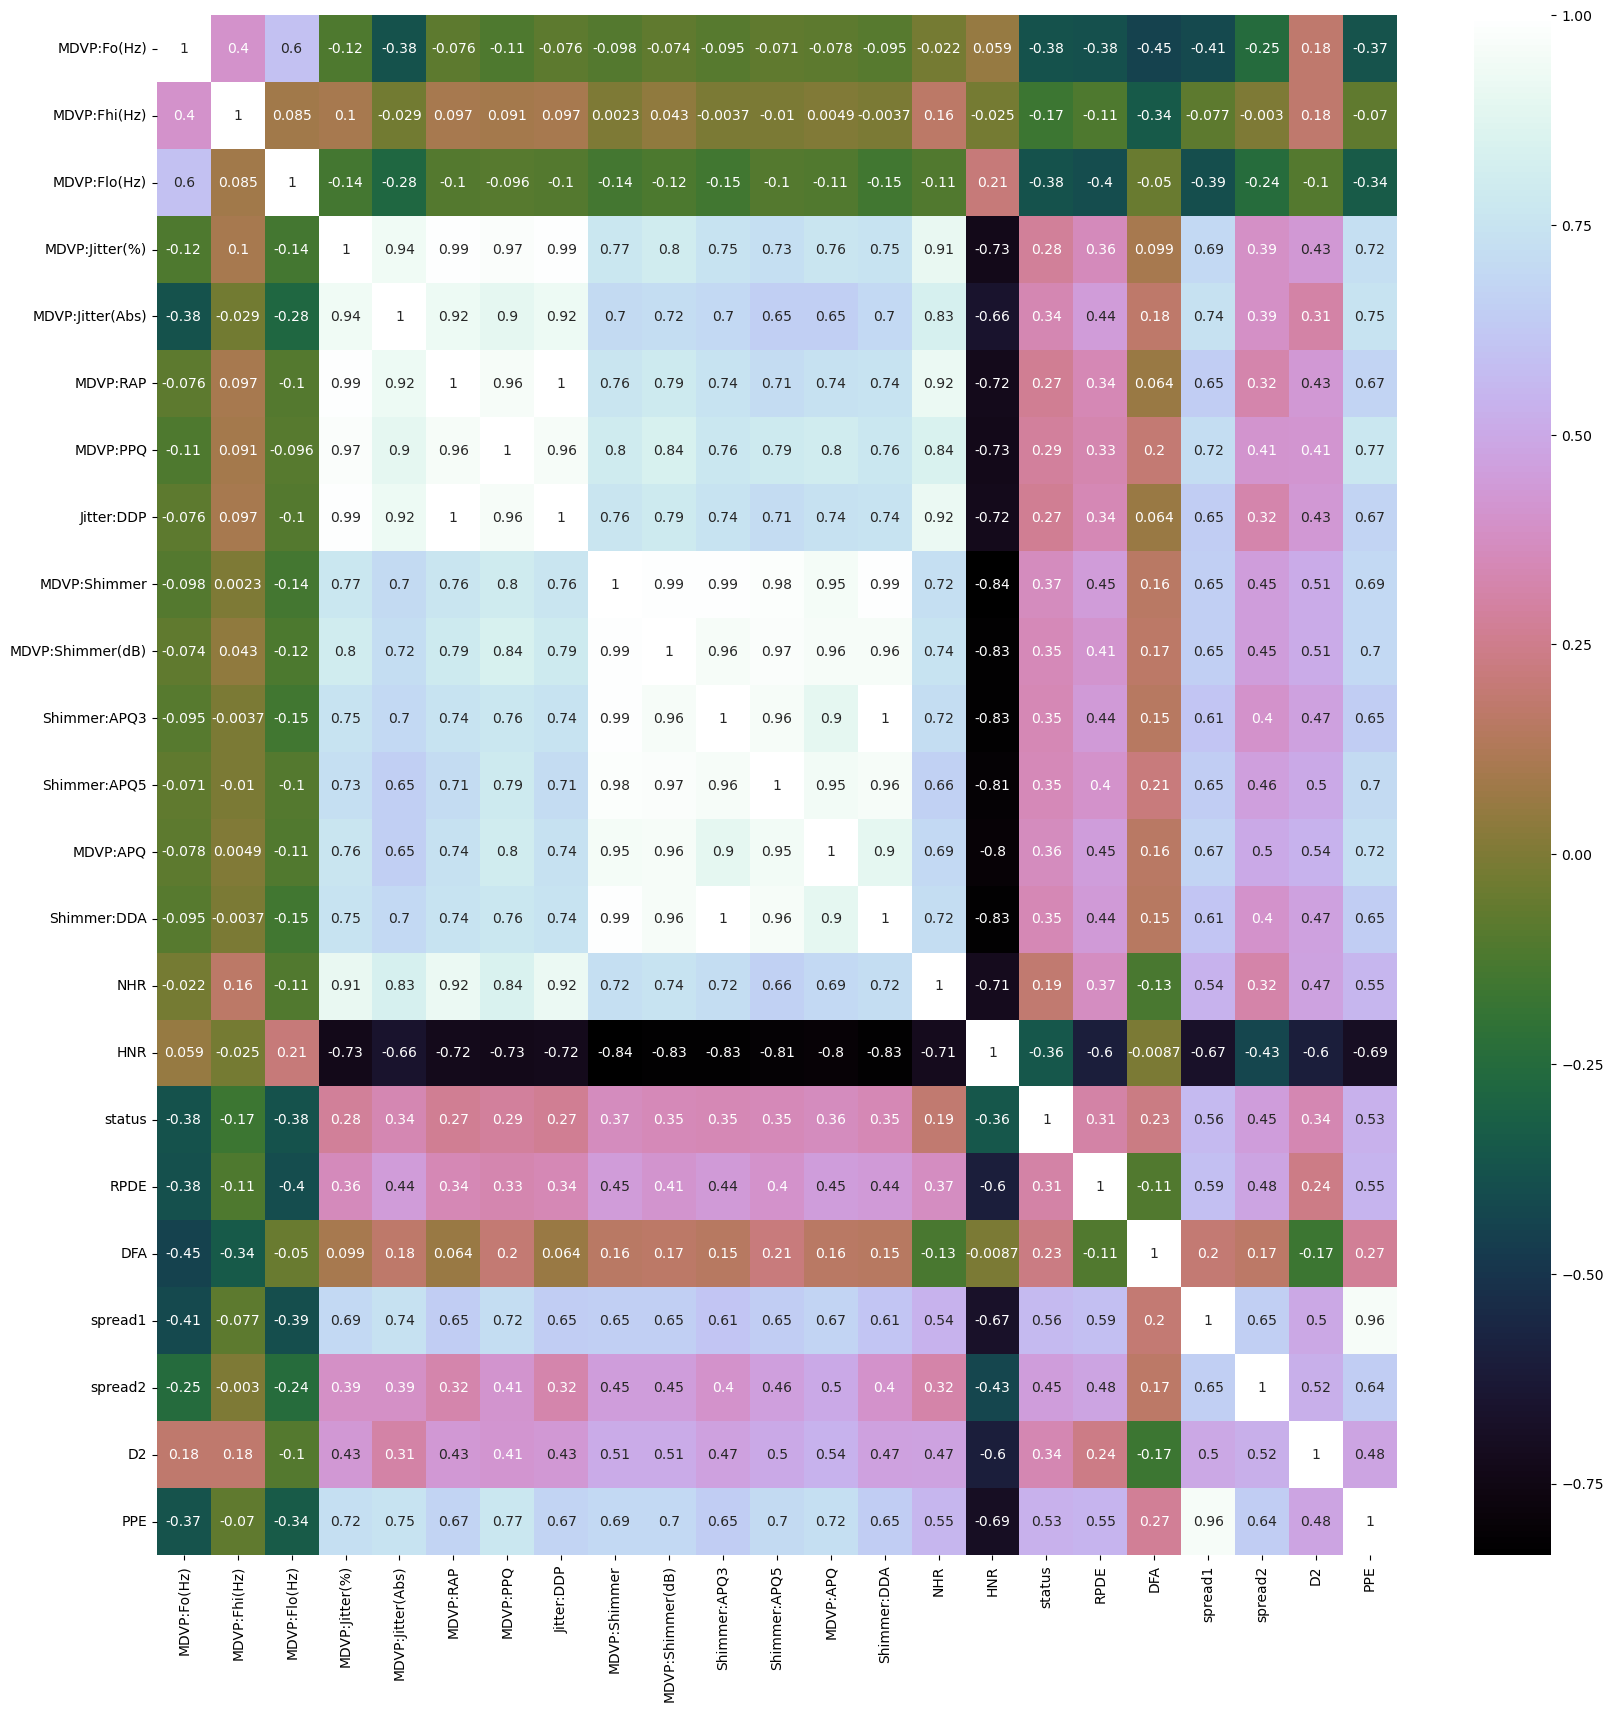

In [26]:
# Correaltion
plt.figure(figsize=(20,20))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='cubehelix')

# Data Processing 

#### Steps
* Finding the labels and features to train the data.
* Scaling the features betweem -1 and 1 to normalize the data.
* Fitting the data and transforming it.
* Split the data into training and testing datasets.

In [45]:
# dropping the status and name column
X = data.drop(columns=['name','status'], axis=1)
y = data['status']

In [46]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [47]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [38]:
labels = data.loc[:,'status'].to_numpy()
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [41]:
features = X[X.columns[0:23]].to_numpy(dtype=object, na_value=0)
features

array([[119.992, 157.302, 74.997, ..., 0.266482, 2.301442, 0.284654],
       [122.4, 148.65, 113.819, ..., 0.33559, 2.486855, 0.368674],
       [116.682, 131.111, 111.555, ..., 0.311173, 2.342259, 0.332634],
       ...,
       [174.688, 240.005, 74.287, ..., 0.158453, 2.679772, 0.131728],
       [198.764, 396.961, 74.904, ..., 0.207454, 2.138608, 0.123306],
       [214.289, 260.277, 77.973, ..., 0.190667, 2.555477, 0.148569]],
      dtype=object)

#### Feature Scaling
The MinMaxScaler transforms features by scaling them to a given range. The fit_transform() method fits to the data and then transforms it. We don’t need to scale the labels.

In [80]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaler = MinMaxScaler((-1,1))
X = scaler.fit_transform(features)
y = labels

In [49]:
X

array([[-0.63138346, -0.77481654, -0.89037042, ...,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-0.6033463 , -0.81013911, -0.4433544 , ...,  0.48267409,
        -0.05370956,  0.34265204],
       [-0.66992292, -0.88174367, -0.46942324, ...,  0.37274182,
        -0.18236124,  0.19336492],
       ...,
       [ 0.00546073, -0.43717403, -0.89854572, ..., -0.31484696,
         0.11793486, -0.63884033],
       [ 0.28578581,  0.20361309, -0.89144127, ..., -0.09423055,
        -0.36355605, -0.67372646],
       [ 0.46654868, -0.35441175, -0.85610326, ..., -0.16981039,
         0.00734563, -0.5690805 ]])

In [50]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [51]:
# Spliting the data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [56]:
X_train

array([[ 0.09080642, -0.61203956, -0.84212466, ..., -0.38682497,
        -0.33179439, -0.29159452],
       [-0.69837925, -0.90917052, -0.86705355, ...,  0.13887519,
        -0.35242283, -0.16985345],
       [-0.19092751, -0.71083009, -0.96632008, ..., -0.18156585,
        -0.35889118, -0.51836679],
       ...,
       [-0.63035885, -0.84663748, -0.47341877, ...,  0.45330119,
        -0.30446361, -0.40500137],
       [-0.37319237, -0.52923645, -0.79638905, ..., -0.08193481,
        -0.30399917, -0.21276314],
       [ 0.27187202, -0.52853425, -0.70847583, ..., -0.28749108,
         0.29826396, -0.34411426]])

In [57]:
print(X_train.shape)
print(X_test.shape)

(156, 22)
(39, 22)


# Model Training

### 1.Logistic Regression Model

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()

# fit the data to the model
lr.fit(X_train, y_train)

LogisticRegression()

In [68]:
# get predictions
y_pred1 = lr.predict(X_test)

In [72]:
# Accuracy score
print(accuracy_score(y_pred1, y_test))

0.8205128205128205


## 2.Decision Tree Classifier Model

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# fit the data to the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
# get predictions
y_pred2 = dt.predict(X_test)

In [73]:
# Accuracy score
print(accuracy_score(y_pred2, y_test))

0.7435897435897436


## 3.SVM Model

In [74]:
from sklearn import svm
model = svm.SVC(kernel='linear')

# fit the data to the model
model.fit(X_train, y_train)

SVC(kernel='linear')

In [75]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [76]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8717948717948718


In [77]:
# accuracy score on testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [78]:
print('Accuracy score of training data : ', test_data_accuracy)

Accuracy score of training data :  0.8461538461538461


### Building a Predictive System
Since SVM has the highest accuracy we're going to use SVM.

In [98]:
input_data = (201.774,262.707,78.228,0.00694,0.00003,0.00412,0.00396,0.01235,0.02574,0.255,0.01454,0.01582,0.01758,0.04363,0.04441,19.368,0.508479,0.683761,-6.934474,0.15989,2.316346,0.112838)
# input_data = (119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print("The Person does not have Parkinson's Disease")

else:
  print("The Person has Parkinson's")

[0]
The Person does not have Parkinson's Disease


## Save the model

In [95]:
import pickle

In [97]:
pickle.dump(model, open('model.sav', 'wb'))